In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import matplotlib.font_manager as font_manager
from os.path import expanduser
import matplotlib as mpl
fontpath = expanduser("/Users/aneeshr/Library/Fonts/LinLibertine_RB.ttf")
prop = font_manager.FontProperties(fname=fontpath)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['text.usetex'] = True
# mpl.rcParams["font.weight"] = "bold"
mpl.rcParams.update({'font.size': 18})

In [2]:
odf = pd.read_csv("./tpch_data/lineitem-only-dates-sorted.csv", names=["shipdate", "commitdate", "receiptdate"])
odf.head()

shipdate  commitdate receiptdate
0  1992-01-02  1992-02-04  1992-01-09
1  1992-01-02  1992-02-05  1992-01-15
2  1992-01-02  1992-02-11  1992-01-18
3  1992-01-02  1992-02-18  1992-01-11
4  1992-01-02  1992-02-25  1992-01-15

In [57]:
odf.groupby("shipdate").count()

commitdate  receiptdate
shipdate                           
1992-01-02          17           17
1992-01-03          41           41
1992-01-04          47           47
1992-01-05          77           77
1992-01-06         106          106
...                ...          ...
1998-11-27          98           98
1998-11-28          89           89
1998-11-29          45           45
1998-11-30          35           35
1998-12-01          18           18

[2526 rows x 2 columns]

In [58]:
odf.groupby("commitdate").count()

shipdate  receiptdate
commitdate                       
1992-01-31        38           38
1992-02-01        86           86
1992-02-02       125          125
1992-02-03       157          157
1992-02-04       207          207
...              ...          ...
1998-10-27       177          177
1998-10-28       179          179
1998-10-29       126          126
1998-10-30        75           75
1998-10-31        49           49

[2466 rows x 2 columns]

In [59]:
odf.groupby("receiptdate").count()

shipdate  commitdate
receiptdate                      
1992-01-04          1           1
1992-01-05          7           7
1992-01-06          5           5
1992-01-07         10          10
1992-01-08         18          18
...               ...         ...
1998-12-27         11          11
1998-12-28          7           7
1998-12-29          2           2
1998-12-30          3           3
1998-12-31          1           1

[2554 rows x 2 columns]

In [60]:
odf

shipdate  commitdate receiptdate
0        1992-01-02  1992-02-04  1992-01-09
1        1992-01-02  1992-02-05  1992-01-15
2        1992-01-02  1992-02-11  1992-01-18
3        1992-01-02  1992-02-18  1992-01-11
4        1992-01-02  1992-02-25  1992-01-15
...             ...         ...         ...
6001210  1998-12-01  1998-10-22  1998-12-30
6001211  1998-12-01  1998-10-27  1998-12-08
6001212  1998-12-01  1998-10-29  1998-12-02
6001213  1998-12-01  1998-10-29  1998-12-21
6001214  1998-12-01  1998-10-30  1998-12-30

[6001215 rows x 3 columns]

In [3]:
from datetime import datetime

date_string = "2012-12-12"
print (datetime.fromisoformat(date_string).date())

2012-12-12


In [4]:
df = odf.head(10000)
shipdate=df["shipdate"]
shipdate=[datetime.fromisoformat(s).date() for s in shipdate]
receiptdate=df["receiptdate"]
receiptdate=[datetime.fromisoformat(r).date() for r in receiptdate]
commitdate=df["commitdate"]
commitdate=[datetime.fromisoformat(c).date() for c in commitdate]

In [5]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates

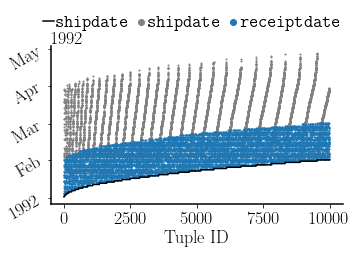

In [14]:
# fig = plt.figure()
# ax = SubplotZero(fig, 111)
# fig.add_subplot(ax)

# for direction in ["xzero", "yzero"]:
#     # adds arrows at the ends of each axis
#     ax.axis[direction].set_axisline_style("-|>")

#     # adds X and Y-axis from the origin
#     ax.axis[direction].set_visible(True)

plt.figure(figsize=(5.3, 4))    
plt.locator_params(nbins=5)
# plt.plot( commitdate,label="commit", alpha=0.3)
commits = np.arange(len(commitdate))

my_cmap = plt.get_cmap("magma")
# my_cmap = sns.color_palette("rocket", as_cmap=True)
my_cmap = ListedColormap(sns.color_palette("winter").as_hex())

locator = mdates.AutoDateLocator(minticks=3, maxticks=5)
formatter = mdates.ConciseDateFormatter(locator)

plt.gca().yaxis.set_major_locator(locator)
plt.gca().yaxis.set_major_formatter(formatter)

# plt.scatter(commits, commitdate, label="commit", color=my_cmap(1.9), alpha=0.5)
plt.scatter(commits, commitdate, label=r"\texttt{shipdate}", color="gray", s=1)
plt.scatter(commits, receiptdate,label=r"\texttt{receiptdate}", s=1)
plt.plot(commits, shipdate,label=r"\texttt{shipdate}", color="k")
# ax = plt.gca()
# ticks=ax.get_yticks()
# print(len(ticks))
# num_y_ticks = (int)(len(ticks)/10)
# print(num_y_ticks)
# current x labels
mpl.rcParams.update({'font.weight': "bold"})
ticks = plt.gca().get_yticks()
# print(ticks)
distance_between_ticks = 1
reduced_yticks = ticks[np.arange(0, len(ticks), distance_between_ticks)]
# print(reduced_yticks)
plt.yticks(rotation=30, fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("Tuple ID", fontsize=18)
# plt.ylabel(fontsize=18)
# text_height=0.5
N=len(commits)
# plt.text(N-1+0.25, text_height, "(a)", ha='center', va='bottom', fontsize=18.0, fontweight='bold')

plt.setp(plt.gca().spines.values(), linewidth=1.5)
# handletextpad=0.1
plt.legend(bbox_to_anchor=(-0.08, 1.15), loc='center left', ncol=3, frameon=False, markerscale=6, 
           labelspacing=0.01,handletextpad=0.1, handlelength=0.6, fontsize=18, columnspacing=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# ax.set_yticks(ax.get_yticks()[::num_y_ticks])
plt.savefig("./new_plots/tpch.pdf")
plt.show()

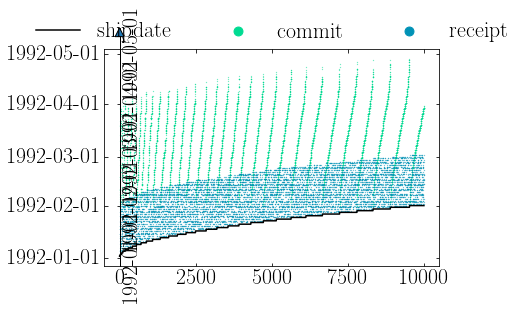

In [65]:
fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

    
ax.locator_params(nbins=5)
# plt.plot( commitdate,label="commit", alpha=0.3)
commits = np.arange(len(commitdate))

my_cmap = plt.get_cmap("magma")
# my_cmap = sns.color_palette("rocket", as_cmap=True)
my_cmap = ListedColormap(sns.color_palette("winter").as_hex())


# plt.scatter(commits, commitdate, label="commit", color=my_cmap(1.9), alpha=0.5)
ax.scatter(commits, commitdate, label="commit", color=my_cmap(1.9), s=0.05)
ax.scatter(commits, receiptdate,label="receipt", color=my_cmap(0.5) , s=0.05)
ax.plot(commits, shipdate,label="shipdate", color="k")
# ax = plt.gca()
# ticks=ax.get_yticks()
# print(len(ticks))
# num_y_ticks = (int)(len(ticks)/10)
# print(num_y_ticks)
# current x labels
ticks = ax.get_yticks()
# print(ticks)
distance_between_ticks = 2
reduced_yticks = ticks[np.arange(0, len(ticks), distance_between_ticks)]
# print(reduced_yticks)
ax.set_yticks(reduced_yticks)




plt.legend(bbox_to_anchor=(0.5, 1.08), loc='center', ncol=3, frameon=False, markerscale=40)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# ax.set_yticks(ax.get_yticks()[::num_y_ticks])
plt.savefig("./new_plots/tpch.pdf")
plt.show()

### Find L

In [190]:
# calculate out of order elements
receipt = odf["receiptdate"]
receipt=[datetime.fromisoformat(r).date() for r in receipt]
sorted_receipt = sorted(receipt)

commit = odf["commitdate"]
commit=[datetime.fromisoformat(c).date() for c in commit]
sorted_commit = sorted(commit)

In [189]:
ship = odf["shipdate"]
ship=[datetime.fromisoformat(s).date() for s in ship]
sorted_ship = sorted(ship)

In [188]:
sorted_receipt[:10]

[datetime.date(1992, 1, 4),
 datetime.date(1992, 1, 5),
 datetime.date(1992, 1, 5),
 datetime.date(1992, 1, 5),
 datetime.date(1992, 1, 5),
 datetime.date(1992, 1, 5),
 datetime.date(1992, 1, 5),
 datetime.date(1992, 1, 5),
 datetime.date(1992, 1, 6),
 datetime.date(1992, 1, 6)]

In [191]:
from tqdm import tqdm

In [192]:
diffs_receipt=[]
for i in tqdm(range(len(receipt))):
    if (receipt[i]-sorted_receipt[i]).days != 0:
#         take note of both the unordered element and its index
        diffs_receipt.append((receipt[i],i))

100%|██████████| 6001215/6001215 [00:04<00:00, 1385600.36it/s]


In [193]:
diffs_commit=[]
for i in tqdm(range(len(commit))):
    if (commit[i]-sorted_commit[i]).days != 0:
#         take note of both the unordered element and its index
        diffs_commit.append((commit[i],i))

100%|██████████| 6001215/6001215 [00:03<00:00, 1551442.34it/s]


In [194]:
diffs_ship=[]
for i in tqdm(range(len(ship))):
    if (ship[i]-sorted_ship[i]).days != 0:
#         take note of both the unordered element and its index
        diffs_ship.append((ship[i],i))

100%|██████████| 6001215/6001215 [00:02<00:00, 2327719.68it/s]


In [195]:
print("K for ReceiptDate = ",len(diffs_receipt))
print("K for CommitDate = ", len(diffs_commit))
print("K for ShipDate = ", len(diffs_ship))

K for ReceiptDate =  5801236
K for CommitDate =  5951003
K for ShipDate =  0


In [196]:
def find_l(array, sorted_array, diffs):
    max_displacement = 0
    for i in tqdm(range(len(diffs))):
#         locate the position of each diff[0] in sorted_array
        loc = sorted_array.index(diffs[i][0])
        displacement = abs(diffs[i][1] - loc)
        if displacement > max_displacement:
            max_displacement = displacement
    
    return max_displacement

In [197]:
l_receipt = find_l(receipt, sorted_receipt, diffs_receipt)
# print(l_receipt)

  1%|          | 32935/5801236 [00:06<19:45, 4866.65it/s] 


KeyboardInterrupt: 